/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


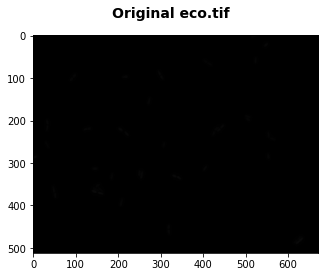

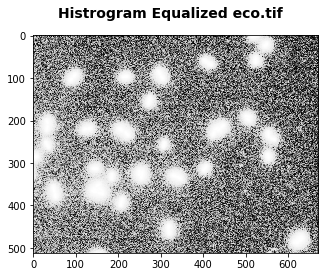

In [4]:
# ECE420 - Spring2017
# Lab6 - Part 1: Histogram Equilization

import numpy as np
from scipy import misc
from scipy import stats
import matplotlib.pyplot as plt
import copy

# Implement This Function
def histeq(pic):
    # Follow the procedures of Histogram Equalizaion
    # Modify the pixel value of pic directly
    #hist,bin_edges = np.histogram(pic,bins = 65536)
    hist = np.zeros(65536)
    M = pic.shape[0]
    N = pic.shape[1]
    for i in range(M):
        for j in range(N):
            hist[pic[i,j]] += 1
    cdf = np.cumsum(hist,dtype = float) 
    cdf_min = np.amin(cdf)
    for i in range(M):
        for j in range(N):       
            pic[i][j] = (cdf[[pic[i][j]]] - cdf_min)/(M * N - 1)*65535

    return pic;

# Histogram Equilization
eco_origin = misc.imread('eco.tif');
eco_histeq = copy.deepcopy(eco_origin);
# Call to histeq to perform Histogram Equilization
eco_histeq = histeq(eco_histeq);
# Show the result in two windows
fig_eco_origin = plt.figure(1);
fig_eco_origin.suptitle('Original eco.tif', fontsize=14, fontweight='bold');
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 65535);
fig_eco_histeq = plt.figure(2)
fig_eco_histeq.suptitle('Histrogram Equalized eco.tif', fontsize=14, fontweight='bold');
plt.imshow(eco_histeq,cmap='gray',vmin = 0, vmax = 65535);
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


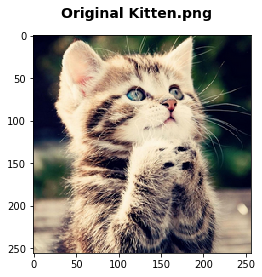

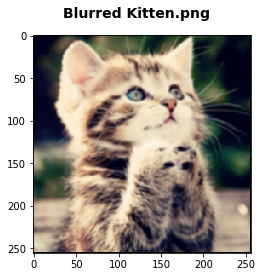

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


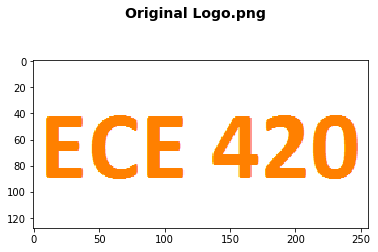

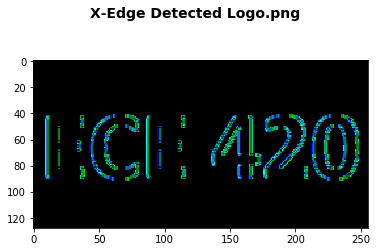

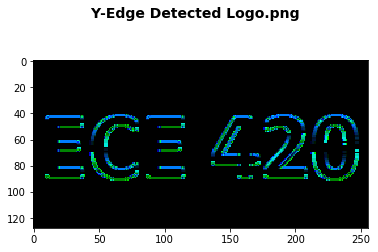

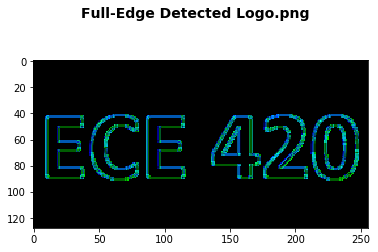

In [3]:
# ECE420 - Spring2017
# Lab6 - Part 2: 2D-Convolution

import numpy
from scipy import misc
import matplotlib.pyplot as plt

# Function Definition Here

# Implement This funtion
def conv2(pic,kernel):
    # Create a new pic with same size but float type
    pic_conv = numpy.zeros(numpy.shape(pic))
    # Perform 2-D Convolution with the given kernel
       # kernel -> float, pic -> uint8
    #pic = pic.astype(float)
    i_h = len(pic[:,0,0])
    i_w = len(pic[0,:,0])
    
    kernel = numpy.flip(kernel)
    k_h = len(kernel[:,0])
    k_w = len(kernel[0,:])
    
    # make a copy with full-zero-padded picture
    copy = numpy.zeros((i_h+2*k_h-2 , i_w+2*k_w-2 , 3), dtype = 'float')
    copy[k_h-1 : k_h-1+i_h , k_w-1 : k_w-1+i_w,:] = pic[:,:,:] 
    
    # new i_h i_w
    i_h2 = i_h + 2*k_h-2
    i_w2 = i_w + 2*k_w-2
    khh = int(k_h/2)
    kwh = int(k_w/2)
    center = int(i_h2/2) # center of zeropadded pic
    for c in range(3):#RGB 
        for h in range(khh , khh + i_h-1): # total shift for height
            for w in range(kwh , kwh + i_w-1): # total shift for weight
                pic_conv[h-khh,w-kwh,c] = numpy.sum(numpy.multiply(copy[h:k_h+h, w:k_w+w,c] , kernel))
   
    return pic_conv.astype("uint8")

# Gaussian Kernel Following the Descriptiong: http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid');
        return None;
    kernel = numpy.zeros((size,size));
    for x in range(size):
        for y in range(size):
            kernel[x][y] = numpy.exp(-((x-(size-1)/2)**2+(y-(size-1)/2)**2)/(2*sigma**2));
    kernel = kernel / numpy.sum(kernel);
    return kernel

# Edge Detection Kernel Source:https://alwaysbusycorner.com/2011/12/02/realbasic-canvas-tutorial-lesson-11-edge-detection-kernel-builder/  
def genxkernel(flag=1):
    if flag == 1:
        kernel = numpy.array([[-1,0,1]]*3);
    else:
        kernel = numpy.array([[-1,0,1],[-2,0,-2],[-1,0,-1]]);
    return kernel

def genykernel(flag=1):
    if flag == 1:
        kernel = numpy.array([[-1,-1,-1],[0,0,0],[1,1,1]]);
    else:
        kernel = numpy.array([[-1,-2,-1],[0,0,0],[1,2,1]]);
    return kernel

# Merge Detected X-Edge and Y-Edge
def merge(picx,picy):
    picshape = numpy.shape(picx);
    if picshape != numpy.shape(picy):
        print('Pic Size Not Matched!');
        return picx;
    picmerge = numpy.zeros(picshape);
    for row in range(picshape[0]):
        for col in range(picshape[1]):
            for channel in range(picshape[2]):
                picmerge[row][col][channel] = numpy.sqrt((picx[row][col][channel]**2+picy[row][col][channel]**2)/2);
    picmerge = picmerge.astype(picx.dtype,copy=False);
    return picmerge;
    
# Main Function Starts Here!!!
# Gaussian Blur Kernel
# Read Image and Display
kitten_origin = misc.imread('kitten.png');
fig_kitten_origin = plt.figure(1);
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold');
plt.imshow(kitten_origin,vmin = 0, vmax = 255);
plt.show(block=False);
# Generate Kernel
kernel_blur = gengaussian(3);
# Apply Convolution
kitten_blur = conv2(kitten_origin,kernel_blur)
# Display Results
fig_kitten_blur = plt.figure(2);
fig_kitten_blur.suptitle('Blurred Kitten.png', fontsize=14, fontweight='bold');
plt.imshow(kitten_blur,vmin = 0, vmax = 255);
plt.show(block=False);

# Edge Detection Kernel
# Read Image and Display
logo_origin = misc.imread('logo.png');
fig_logo_origin = plt.figure(3);
fig_logo_origin.suptitle('Original Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_origin,vmin = 0, vmax = 255);
plt.show(block=False);
# X-Edge Detection
kernel_xedge = genxkernel();
logo_xedge = conv2(logo_origin,kernel_xedge)
fig_logo_xedge = plt.figure(4);
fig_logo_xedge.suptitle('X-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_xedge,vmin = 0, vmax = 255);
plt.show(block=False);
# Y-Edge Detection
kernel_yedge = genykernel();
logo_yedge = conv2(logo_origin,kernel_yedge)
fig_logo_yedge = plt.figure(5);
fig_logo_yedge.suptitle('Y-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_yedge,vmin = 0, vmax = 255);
plt.show(block=False);
# Merge Edges
logo_fulledge = merge(logo_xedge,logo_yedge);
fig_logo_fulledge = plt.figure(6);
fig_logo_fulledge.suptitle('Full-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_fulledge,vmin = 0, vmax = 255);
plt.show();